In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
X = df[["TV" , "radio" , "newspaper"]]
y = df[["sales"]]

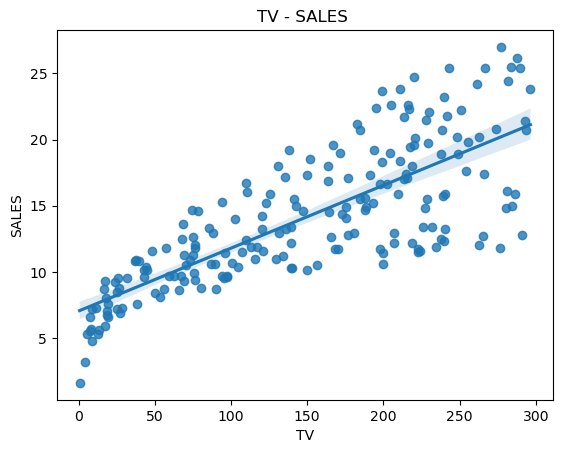

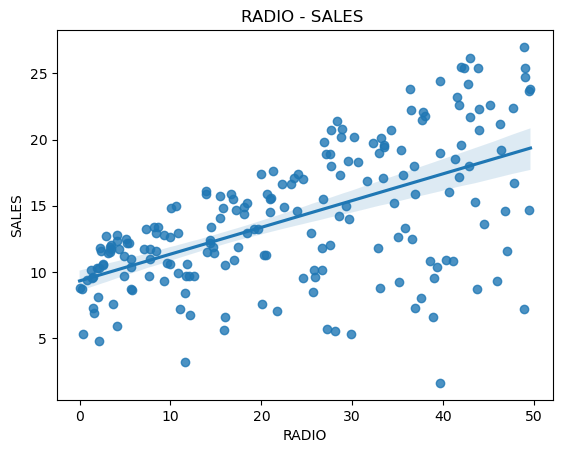

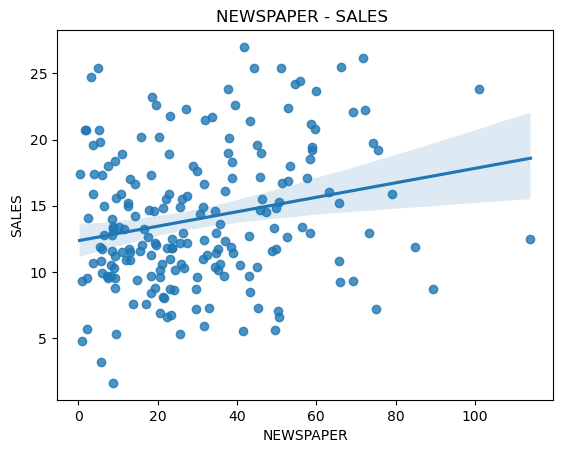

In [16]:
 
for columName in X.columns:
    sns.regplot(x = columName , y = "sales" , data = df)
    plt.title(f"{columName.upper()} - SALES ")
    plt.xlabel(columName.upper())
    plt.ylabel("SALES")
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.30 ,random_state= 0)

In [22]:
import statsmodels.api as sm

In [25]:
model = sm.OLS(y_train , X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              2862.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                   2.50e-123
Time:                        12:42:23   Log-Likelihood:                         -289.37
No. Observations:                 140   AIC:                                      584.7
Df Residuals:                     137   BIC:                                      593.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0520      0.002     33.691      0.000       0.049       0.055
radio          0.2321      0.010     22.911      0.000       0.212       0.252
newspaper      0.0188      0.008      2.371      0.019       0.003       0.034
==============================================================================
Omnibus:                        1.996   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.965
Skew:                           0.284   Prob(JB):                        0.374
Kurtosis:                       2.878   Cond. No.                         12.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X_train.drop(columns=["newspaper"] , inplace= True)

In [28]:
X_test.drop(columns=["newspaper"] , inplace= True)

In [29]:
model = sm.OLS(y_train , X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              4151.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                   5.39e-124
Time:                        12:44:28   Log-Likelihood:                         -292.19
No. Observations:                 140   AIC:                                      588.4
Df Residuals:                     138   BIC:                                      594.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0535      0.001     37.424      0.000       0.051       0.056
radio          0.2438      0.009     27.132      0.000       0.226       0.262
==============================================================================
Omnibus:                        4.428   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.237
Skew:                           0.426   Prob(JB):                        0.120
Kurtosis:                       3.014   Cond. No.                         9.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.linear_model import LinearRegression


In [31]:
regressor = LinearRegression()
regressor.fit(X_train , y_train)


LinearRegression()

In [32]:
regressor.intercept_

array([2.90989569])

In [33]:
regressor.coef_

array([[0.04396652, 0.20099526]])

In [34]:
y_pred = regressor.predict(X_test)
y_pred

array([[10.07278148],
       [ 7.43976654],
       [ 6.94476735],
       [24.14909503],
       [11.96075981],
       [ 6.5264869 ],
       [13.12107265],
       [14.93352168],
       [11.01123244],
       [16.28086891],
       [22.98084407],
       [ 9.11552   ],
       [10.31763983],
       [15.40780747],
       [11.63551101],
       [12.13417808],
       [18.60730766],
       [10.90008459],
       [16.12336036],
       [17.23683371],
       [24.19746203],
       [ 9.46028893],
       [15.13082608],
       [12.3985987 ],
       [ 5.66409484],
       [15.27660989],
       [12.20070341],
       [20.98791782],
       [13.24078399],
       [ 9.17903346],
       [13.24725206],
       [21.58400169],
       [18.04513097],
       [21.17442262],
       [ 6.68607836],
       [ 6.16411221],
       [ 7.9422432 ],
       [13.02979067],
       [14.86149453],
       [ 6.22000647],
       [12.29067722],
       [ 9.23932438],
       [15.08187203],
       [16.2657799 ],
       [17.12377148],
       [13

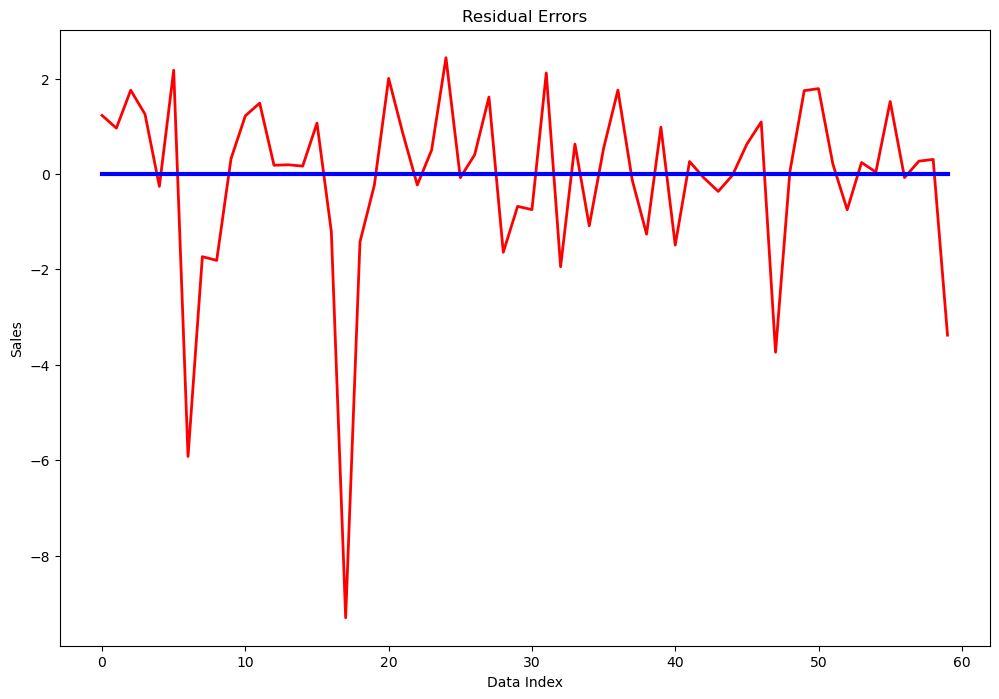

In [36]:
fig , ax = plt.subplots(figsize = (12,8))
ax.plot(range(len(y_pred)) , y_test - y_pred , color = "red" , linewidth = 2)
ax.plot(range(len(y_pred)) , np.zeros(60) , color = "blue" , linewidth = 3)

plt.title("Residual Errors")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.show()

In [37]:
from sklearn.metrics import r2_score , mean_squared_error

In [38]:
r2 = r2_score(y_test , y_pred)
r2 * 100

86.56552691810043

In [41]:
mse = mean_squared_error(y_test , y_pred , squared = True)
mse

3.670809675491497